# Rice Classification using AI
***

<span style="font-family:verdana"> In this case study I will be classifing rice images of 5 types namely Arbiro, Basmati, Ipsala, Jasmine, and Karacadag.
Due to comutational power limitation, I have considered 10000 images (2000 images of each type).</span>


In [19]:
# from google.colab import drive
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from tensorflow.keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from tensorflow.keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
import sklearn.metrics
from sklearn.metrics import confusion_matrix


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import random
import glob
import shutil
import matplotlib.pyplot as plt
import itertools

from time import time

## Data collection and Organization 
<span style="font-family:verdana">I have seperated the 10000 images into 3 categories i.e. train , validation and test. I have kept 75% of the images as tarin images, 15% as validation images and rest 10% of the images as test images. below is the code to seperate the images into train,validation and test datasets.</span>

In [3]:
os.chdir('E:/MS UK/MS Assignments/Rice Dataset')
if os.path.isdir('train/Arborio') is False:
    os.makedirs('train/Arborio')
    os.makedirs('train/Basmati')
    os.makedirs('train/Ipsala')
    os.makedirs('train/Jasmine')
    os.makedirs('train/Karacadag')
    
    os.makedirs('test/Arborio')
    os.makedirs('test/Basmati')
    os.makedirs('test/Ipsala')
    os.makedirs('test/Jasmine')
    os.makedirs('test/Karacadag')
    
    os.makedirs('valid/Arborio')
    os.makedirs('valid/Basmati')
    os.makedirs('valid/Ipsala')
    os.makedirs('valid/Jasmine')
    os.makedirs('valid/Karacadag')
    
    for c in random.sample(glob.glob('A*'),1400):
        shutil.move(c, 'train/Arborio' )
    for c in random.sample(glob.glob('B*'),1400):
        shutil.move(c, 'train/Basmati' )
    for c in random.sample(glob.glob('I*'),1400):
        shutil.move(c, 'train/Ipsala' )
    for c in random.sample(glob.glob('J*'),1400):
        shutil.move(c, 'train/Jasmine' )
    for c in random.sample(glob.glob('K*'),1400):
        shutil.move(c, 'train/Karacadag' )
    
    for c in random.sample(glob.glob('A*'),400):
        shutil.move(c, 'valid/Arborio' )
    for c in random.sample(glob.glob('B*'),400):
        shutil.move(c, 'valid/Basmati' )
    for c in random.sample(glob.glob('I*'),400):
        shutil.move(c, 'valid/Ipsala' )
    for c in random.sample(glob.glob('J*'),400):
        shutil.move(c, 'valid/Jasmine' )
    for c in random.sample(glob.glob('K*'),400):
        shutil.move(c, 'valid/Karacadag' )
    
    for c in random.sample(glob.glob('A*'),200):
        shutil.move(c, 'test/Arborio' )
    for c in random.sample(glob.glob('B*'),200):
        shutil.move(c, 'test/Basmati' )
    for c in random.sample(glob.glob('I*'),200):
        shutil.move(c, 'test/Ipsala' )
    for c in random.sample(glob.glob('J*'),200):
        shutil.move(c, 'test/Jasmine' )
    for c in random.sample(glob.glob('K*'),200):
        shutil.move(c, 'test/Karacadag' )

In [4]:
# train_path=('/content/drive/MyDrive/Rice Dataset/Rice Dataset.rar (Unzipped Files)/train')
# valid_path=('/content/drive/MyDrive/Rice Dataset/Rice Dataset.rar (Unzipped Files)/valid')
# test_path=('/content/drive/MyDrive/Rice Dataset/Rice Dataset.rar (Unzipped Files)/test')

train_path=('E:/MS UK/MS Assignments/Rice Dataset/train')
valid_path=('E:/MS UK/MS Assignments/Rice Dataset/valid')
test_path=('E:/MS UK/MS Assignments/Rice Dataset/test')

## Data Preprocessing
<span style="font-family:verdana">After collecting and organizing the dataset, next step is to preprocess the dataset, I have used ImageDataGenerator which generates the batches of image data as it is impossible to feed such a lagrge number of images to the hardware resources.  
I have kept all image sizes as 250X250, and batch size as 10.</span>

In [5]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=train_path,target_size=(250,250) ,classes=['Arborio','Basmati','Ipsala','Jasmine','Karacadag'],
                                    batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=valid_path,target_size=(250,250) ,classes=['Arborio','Basmati','Ipsala','Jasmine','Karacadag'],
                                    batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
                .flow_from_directory(directory=test_path,target_size=(250,250) ,classes=['Arborio','Basmati','Ipsala','Jasmine','Karacadag'],
                                    batch_size=10)

Found 7000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [6]:
assert train_batches.n==7000
assert valid_batches.n==2000
assert test_batches.n==1000

assert train_batches.num_classes==test_batches.num_classes==valid_batches.num_classes==5

print(train_batches.class_indices)

{'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}


<span style="font-family:verdana"> It is important to see how model model behaves in each epoch, so following code will record the train and validation accuracy for each epoch. Also it will record the train and validation loss in each epoch. </span>   

In [7]:
def plot_training(applied_model):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(applied_model.history['accuracy'])
    plt.plot(applied_model.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.subplot(1,2,2)
    plt.plot(applied_model.history['loss'])
    plt.plot(applied_model.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [8]:
imgs, labels=next(train_batches)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

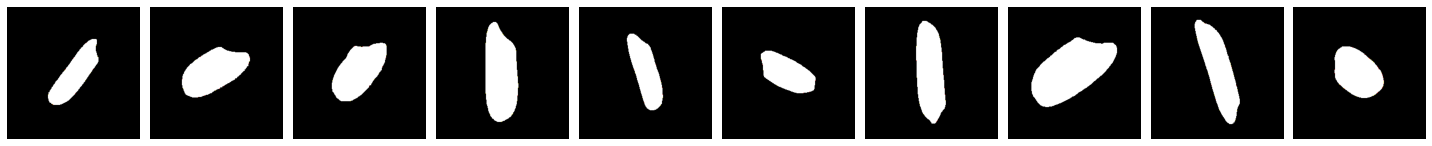

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [9]:
# Displaying the 10 images from train batch.

def plotImages(images_arr):
     fig,axes=plt.subplots(1,10,figsize=(20,20))
     axes=axes.flatten()
     for img,ax in zip(images_arr,axes):
         ax.imshow(img)
         ax.axis('off')
     plt.tight_layout()
     plt.show()
plotImages(imgs)
print(labels)

## Creating models 
### 1. ANN model
<span style="font-family:verdana"> I have applied simple ANN model with 2 hidden layers. I have considered drop out layer as well with the rate 0.5 to avoid model overfitting.</span>


In [10]:
model=Sequential()

model.add(Flatten(input_shape=(250,250,3)))

model.add(Dense(100,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(100,activation='relu'))
tf.keras.layers.Dropout(0.5),

model.add(Dense(5,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 187500)            0         
                                                                 
 dense (Dense)               (None, 100)               18750100  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 5)                 505       
                                                                 
Total params: 18,760,705
Trainable params: 18,760,705
Non-trainable params: 0
_________________________________________________________________


### Visualizing ANN Model 

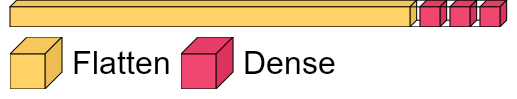

In [13]:
import visualker
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

In [29]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

### Early Stopping
<span style="font-family:verdana"> I have saved the train models as well as using checkpoints also applied the early stopping. I am monitoring validation loss for the same, if it has not decresed for 3 consecutive epochs then model will stop training early i.e. before completing 10 epochs. <span>

In [30]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

models_dir = "saved_models"
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
checkpointer = ModelCheckpoint( filepath='saved_models/model_ann.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [31]:
# Training of ANN model with 10 epochs
model_ann=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)


Epoch 1/10
700/700 [==============================] - ETA: 0s - loss: 75.9204 - accuracy: 0.7527
Epoch 1: val_accuracy improved from -inf to 0.74650, saving model to saved_models/model_ann.hdf5
700/700 [==============================] - 2662s 4s/step - loss: 75.9204 - accuracy: 0.7527 - val_loss: 114.2606 - val_accuracy: 0.7465 - lr: 1.0000e-04
Epoch 2/10
700/700 [==============================] - ETA: 0s - loss: 41.3539 - accuracy: 0.8547
Epoch 2: val_accuracy improved from 0.74650 to 0.83850, saving model to saved_models/model_ann.hdf5
700/700 [==============================] - 35s 50ms/step - loss: 41.3539 - accuracy: 0.8547 - val_loss: 55.2195 - val_accuracy: 0.8385 - lr: 1.0000e-04
Epoch 3/10
700/700 [==============================] - ETA: 0s - loss: 28.8279 - accuracy: 0.9004
Epoch 3: val_accuracy improved from 0.83850 to 0.92950, saving model to saved_models/model_ann.hdf5
700/700 [==============================] - 36s 51ms/step - loss: 28.8279 - accuracy: 0.9004 - val_loss: 19.

### Plotting the Accuracy an loss metric of the ANN model

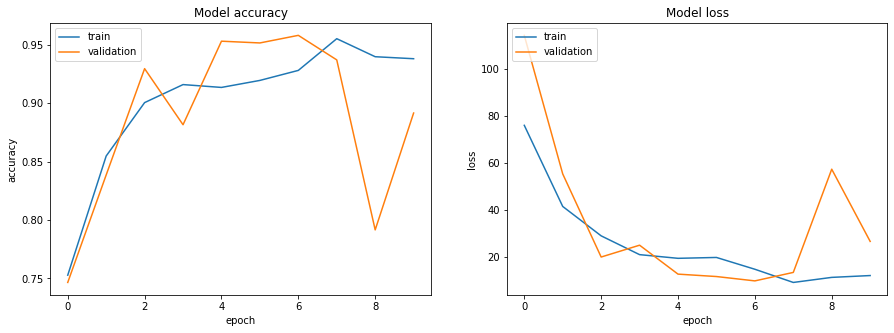

In [32]:
plot_training(model_ann)

### Testing the performance the ANN model by feeding them the test batches

In [33]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
#test_batches.classes
model.load_weights('saved_models/model_ann.hdf5')
score_ann = model.evaluate(test_batches, verbose=1)
score_ann

100/100 [==============================] - 340s 3s/step - loss: 9.0851 - accuracy: 0.9580


[9.0851469039917, 0.9580000042915344]

### 2. CNN model
<span style="font-family:verdana"> Second model that I have used is CNN model, with 2 convolutional layers as hidden layers , 2 max pooing layer to reduce the dimensionality of the convolutional output, and finally drop layer after each hidden layer to avoid model overfitting.<span>

In [14]:
model=Sequential([Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(250,250,3)),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),
                 
                  Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
                  MaxPool2D(pool_size=(2,2),strides=2),
                  tf.keras.layers.Dropout(0.5),
                  
                  Flatten(), 
                  Dense(units=5,activation='softmax'),
                 ])
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 32)     0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 125, 125, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 62, 62, 32)       

### Visualizing CNN Model 

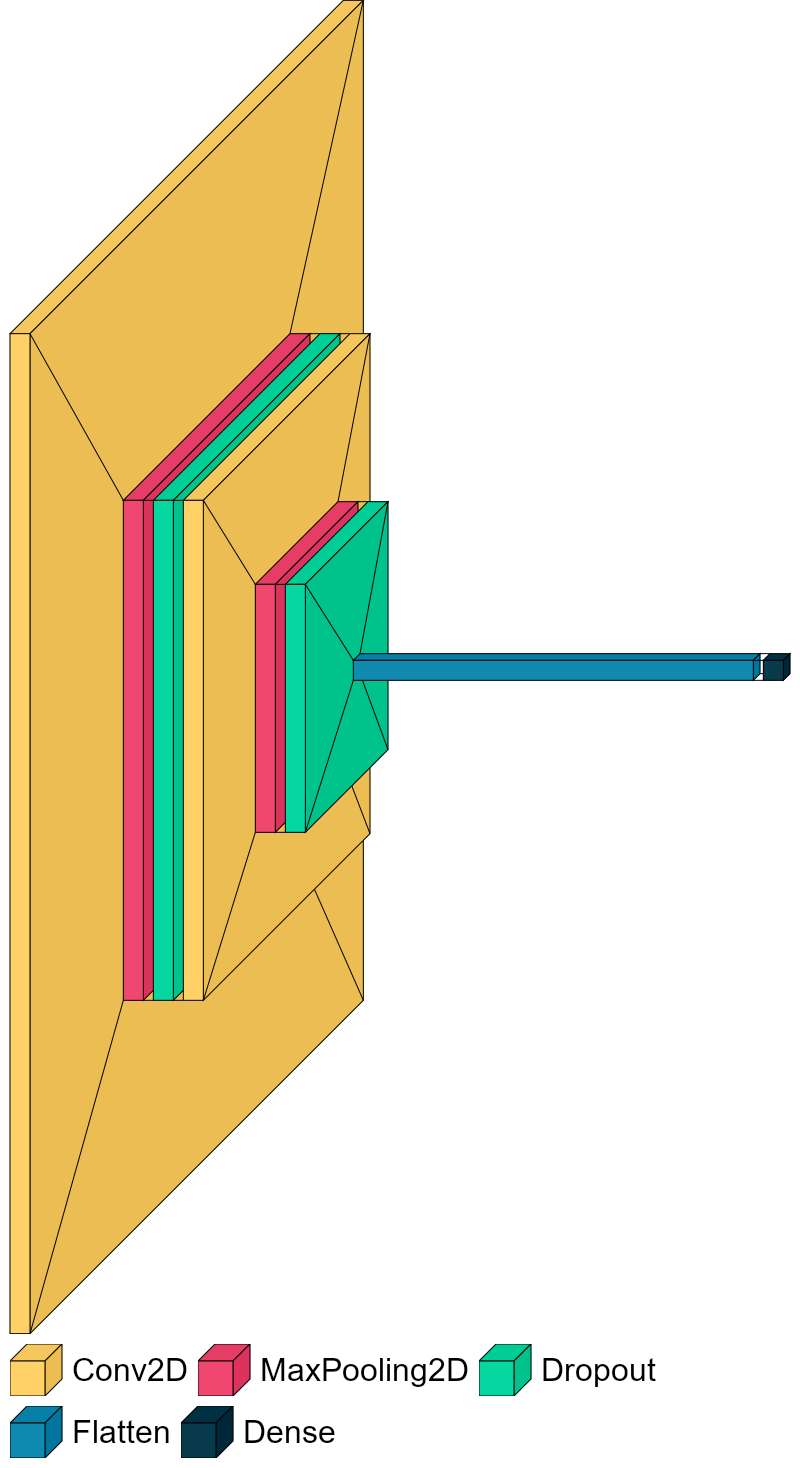

In [15]:
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
checkpointer = ModelCheckpoint( filepath='saved_models/model_seq.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [37]:
# Training of CNN model with 10 epochs
model_seq=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
699/700 [============================>.] - ETA: 0s - loss: 19.5285 - accuracy: 0.7237
Epoch 1: val_accuracy improved from -inf to 0.73200, saving model to saved_models/model_seq.hdf5
700/700 [==============================] - 47s 54ms/step - loss: 19.5006 - accuracy: 0.7241 - val_loss: 5.3803 - val_accuracy: 0.7320 - lr: 1.0000e-04
Epoch 2/10
699/700 [============================>.] - ETA: 0s - loss: 1.4598 - accuracy: 0.9123
Epoch 2: val_accuracy did not improve from 0.73200
700/700 [==============================] - 38s 55ms/step - loss: 1.4577 - accuracy: 0.9124 - val_loss: 2.7623 - val_accuracy: 0.7100 - lr: 1.0000e-04
Epoch 3/10
699/700 [============================>.] - ETA: 0s - loss: 0.6765 - accuracy: 0.9449
Epoch 3: val_accuracy improved from 0.73200 to 0.91100, saving model to saved_models/model_seq.hdf5
700/700 [==============================] - 38s 54ms/step - loss: 0.6761 - accuracy: 0.9449 - val_loss: 0.3463 - val_accuracy: 0.9110 - lr: 1.0000e-04
Epoch 4/10
6

### Plotting acuracy and loss metrics of the CNN model

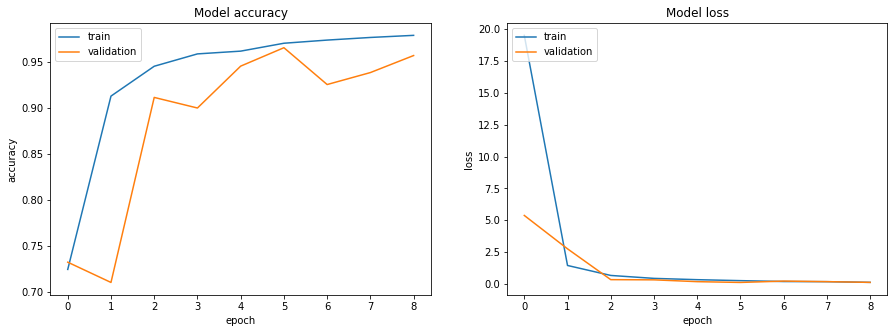

In [38]:
plot_training(model_seq)

### Testing the performance the CNN model by feeding them the test batches

In [39]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
#test_batches.classes
model.load_weights('saved_models/model_seq.hdf5')
score1 = model.evaluate(test_batches, verbose=1)
score1

100/100 [==============================] - 5s 47ms/step - loss: 0.1048 - accuracy: 0.9680


[0.10477089136838913, 0.9679999947547913]

### Plotting the confusion matrix of CNN model
<span style="font-family:verdana"> I have used model.evalute() to gain the testing accuracy, also I have used model.predict() to have test accuracy,  to my surprise, both are not same and have huge difference in terms of values. I have not figured it out why this has happened. 

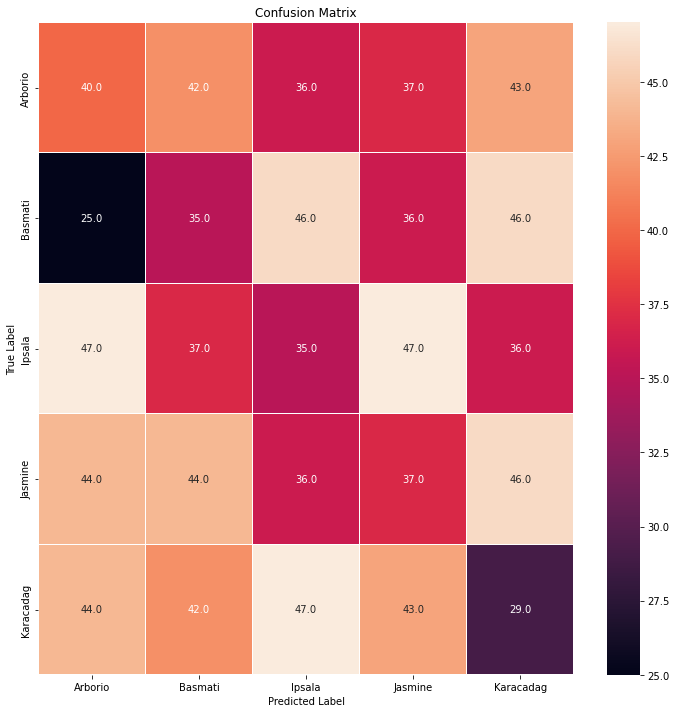

In [40]:
from sklearn.metrics import classification_report
import seaborn as sns
Y_pred=model.predict(test_batches)
y_pred = np.argmax(Y_pred, axis=1)
confusion_mtx = confusion_matrix(y_pred, test_batches.classes)
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax,)
sns.color_palette("rocket", as_cmap=True)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax.xaxis.set_ticklabels(test_batches.class_indices)
rice_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
ax.yaxis.set_ticklabels(rice_labels)
plt.title("Confusion Matrix")
plt.show()

In [41]:
import pandas as pd
report1 = classification_report(test_batches.classes, y_pred, target_names=rice_labels, output_dict=True)
df1 = pd.DataFrame(report1).transpose()
df1

,precision,recall,f1-score,support
Arborio,0.202020,0.200,0.201005,200.000
Basmati,0.186170,0.175,0.180412,200.000
Ipsala,0.173267,0.175,0.174129,200.000
Jasmine,0.178744,0.185,0.181818,200.000
Karacadag,0.141463,0.145,0.143210,200.000
accuracy,0.176000,0.176,0.176000,0.176
macro avg,0.176333,0.176,0.176115,1000.000
weighted avg,0.176333,0.176,0.176115,1000.000


### 3. CNN VGG 16
<span style="font-family:verdana"> Third model that I have applied is CNN VGG 16 through the transfer learning. The source of this model is referred from 
    
Simonyan, K. and Zisserman, A., 2014. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556. </span>

In [16]:
def vgg(input_shape, n_classes):
  
  input = Input(input_shape)
  
  x = Conv2D(64, 3, padding='same', activation='relu')(input)
  x = Conv2D(64, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(28, 3, padding='same', activation='relu')(x)
  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = Conv2D(256, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = Conv2D(512, 3, padding='same', activation='relu')(x)
  x = MaxPool2D(2, strides=2, padding='same')(x)
  
  x = Flatten()(x)
  x = Dense(4096, activation='relu')(x)
  x = Dense(4096, activation='relu')(x)
  
  output = Dense(5, activation='softmax')(x)
  
  model = Model(input, output)
  return model

In [17]:
K.clear_session()
input_shape=(250,250,3)
n_classes=5
model=vgg(input_shape,n_classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 125, 125, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 28)      16156     
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 128)     32384     
                                                             

### Visualizing CNN VGG 16 Model 

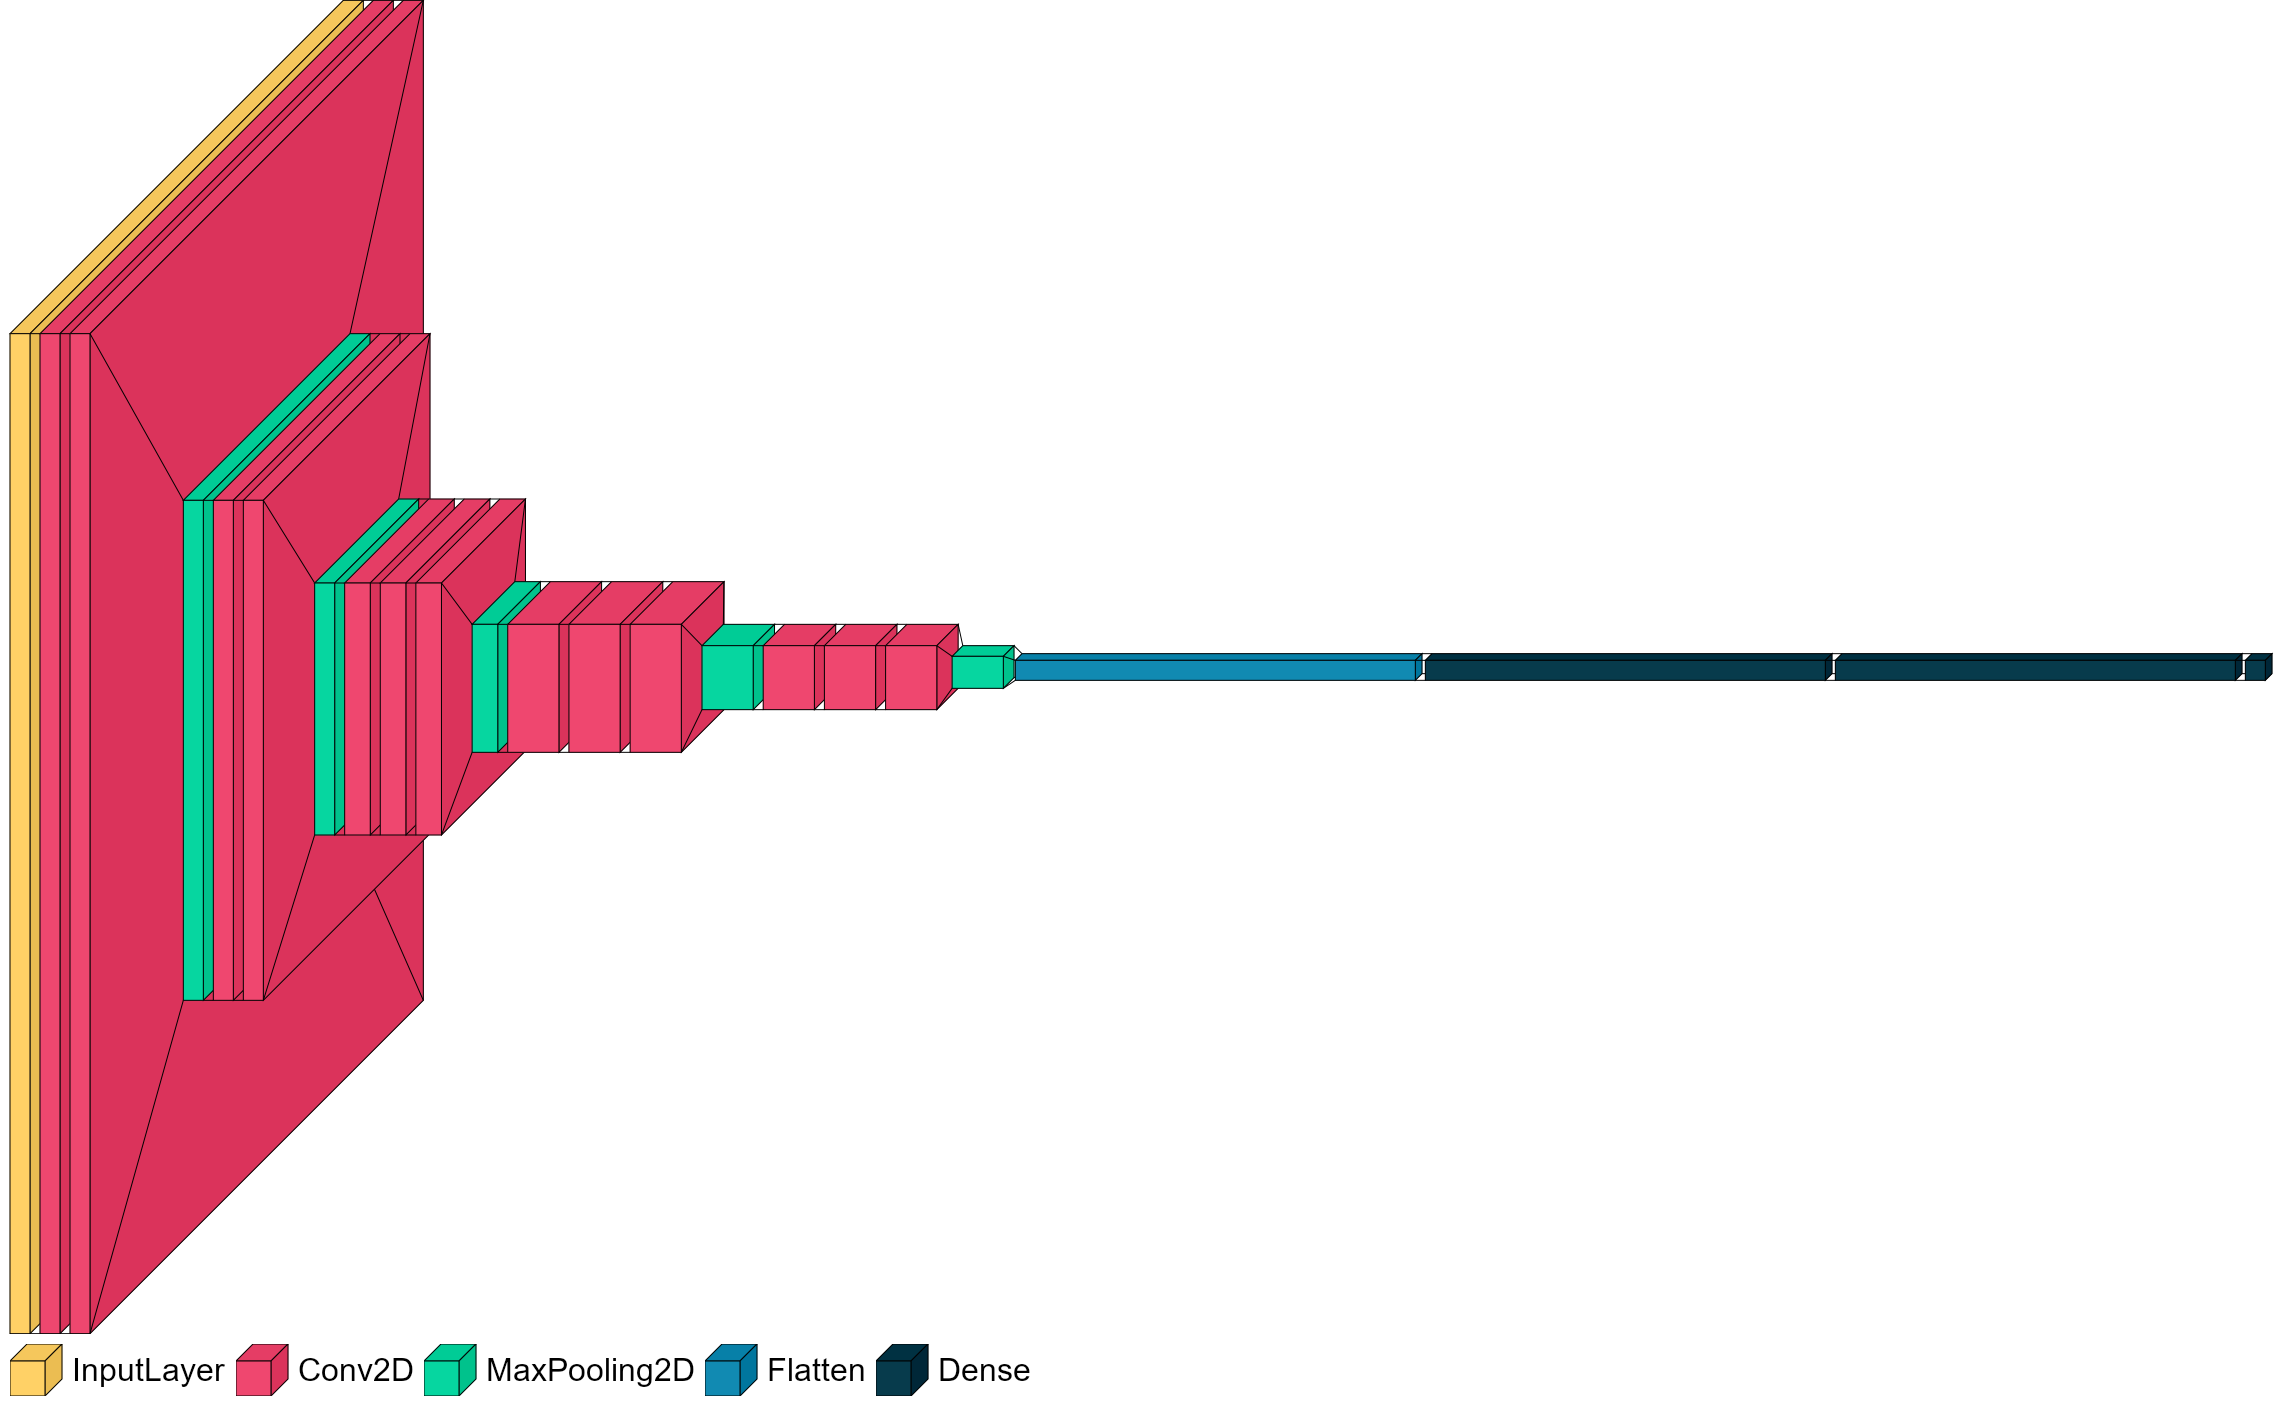

In [18]:
font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

In [46]:
checkpointer = ModelCheckpoint( filepath='saved_models/VGG_model.hdf5',monitor='val_accuracy', mode='max',
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.001)
callbacks=[early_stopping, reduce_lr, checkpointer]

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
# Training of CNN VGG 16 model with 10 epochs
VGG_model=model.fit(x=train_batches, validation_data=valid_batches,epochs=10,verbose=1,callbacks=callbacks)

Epoch 1/10
700/700 [==============================] - ETA: 0s - loss: 0.4064 - accuracy: 0.8367
Epoch 1: val_accuracy improved from -inf to 0.94400, saving model to saved_models/VGG_model.hdf5
700/700 [==============================] - 179s 250ms/step - loss: 0.4064 - accuracy: 0.8367 - val_loss: 0.1722 - val_accuracy: 0.9440 - lr: 1.0000e-04
Epoch 2/10
700/700 [==============================] - ETA: 0s - loss: 0.1393 - accuracy: 0.9549
Epoch 2: val_accuracy improved from 0.94400 to 0.97300, saving model to saved_models/VGG_model.hdf5
700/700 [==============================] - 173s 247ms/step - loss: 0.1393 - accuracy: 0.9549 - val_loss: 0.0872 - val_accuracy: 0.9730 - lr: 1.0000e-04
Epoch 3/10
700/700 [==============================] - ETA: 0s - loss: 0.1011 - accuracy: 0.9711
Epoch 3: val_accuracy did not improve from 0.97300
700/700 [==============================] - 164s 234ms/step - loss: 0.1011 - accuracy: 0.9711 - val_loss: 0.0919 - val_accuracy: 0.9725 - lr: 1.0000e-04
Epoch 4/

### Plotting acuracy and loss metrics of the CNN VGG 16 model

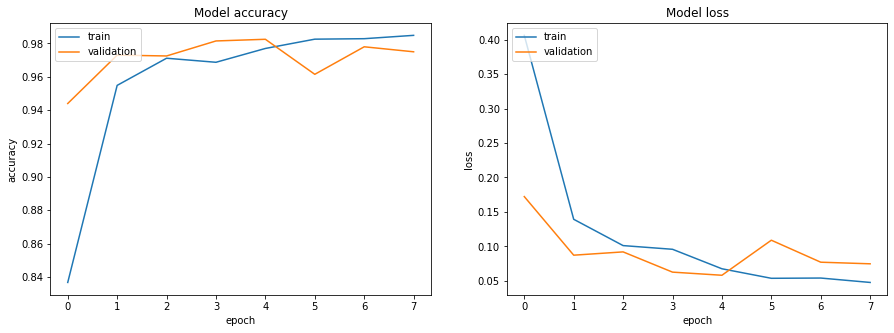

In [50]:
plot_training(VGG_model)

### Testing the performance the CNN VGG 16 model by feeding them the test batches

In [49]:
test_img,test_labels=next(test_batches)
#plotImages(test_img)
#print(test_labels)
#test_batches.classes
model.load_weights('saved_models/VGG_model.hdf5')
score_vgg = model.evaluate(test_batches, verbose=1)
score_vgg

100/100 [==============================] - 9s 85ms/step - loss: 0.0496 - accuracy: 0.9850


[0.04958004131913185, 0.9850000143051147]

In [51]:
#model=tf.keras.models.load_model('C:/Users/am21007/Downloads/Rice Dataset/saved_models/VGG_model.hdf5', compile=True)